In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북안에 보이게 하기 위해
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
df = pd.read_csv("Data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory =False)

In [5]:
df.shape

(91335, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [7]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [8]:
df_null_count = null_count.reset_index()
df_null_count.columns = ["컬럼명", "결측치수"]

In [9]:
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [10]:
df_null_count_top = df_null_count.sort_values(by="결측치수",
                          ascending = False).head(10)

In [11]:
drop_columns = df_null_count_top["컬럼명"].tolist()

In [12]:
df[drop_columns]

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0
...,...,...,...,...,...,...,...,...,...,...
91330,베스트,NaN,NaN,NaN,NaN,NaN,NaN,G47811,의약품 및 의료용품 소매업,30.0
91331,봄산후조,NaN,NaN,NaN,NaN,청한프라자,NaN,S96993,개인 간병인 및 유사 서비스업,41.0
91332,NaN,NaN,NaN,NaN,2,한신시티빌,1.0,Q86102,일반 병원,26.0
91333,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Q86203,한의원,11.0


In [13]:
df = df.drop(drop_columns, axis = 1)
print(df.shape)

(91335, 29)


In [23]:
df_medical = df[(df["상권업종소분류명"] == "피부과")|
               (df["상권업종소분류명"] == "성형외과")].copy()

df_medical_seoul = df_medical[df_medical["시도명"] == "서울특별시"]

In [24]:
df_medical_gangnam = df_medical_seoul[df_medical_seoul["시군구명"] == "강남구"]

In [25]:
df_medical_gangnam.shape

(159, 29)

In [28]:
c = df_medical_seoul["시군구명"].value_counts()

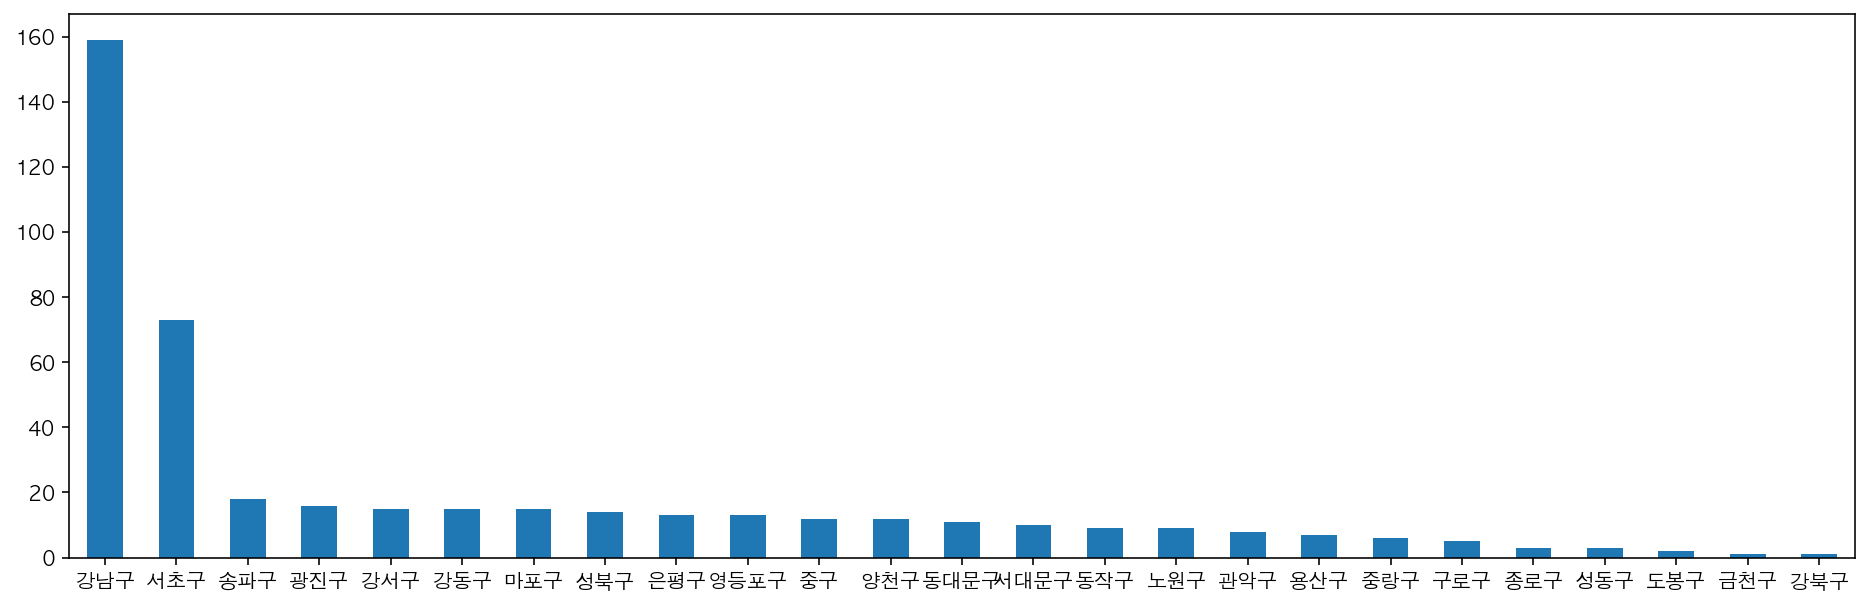

In [29]:
c.plot.bar(rot=0, figsize = (16,5))

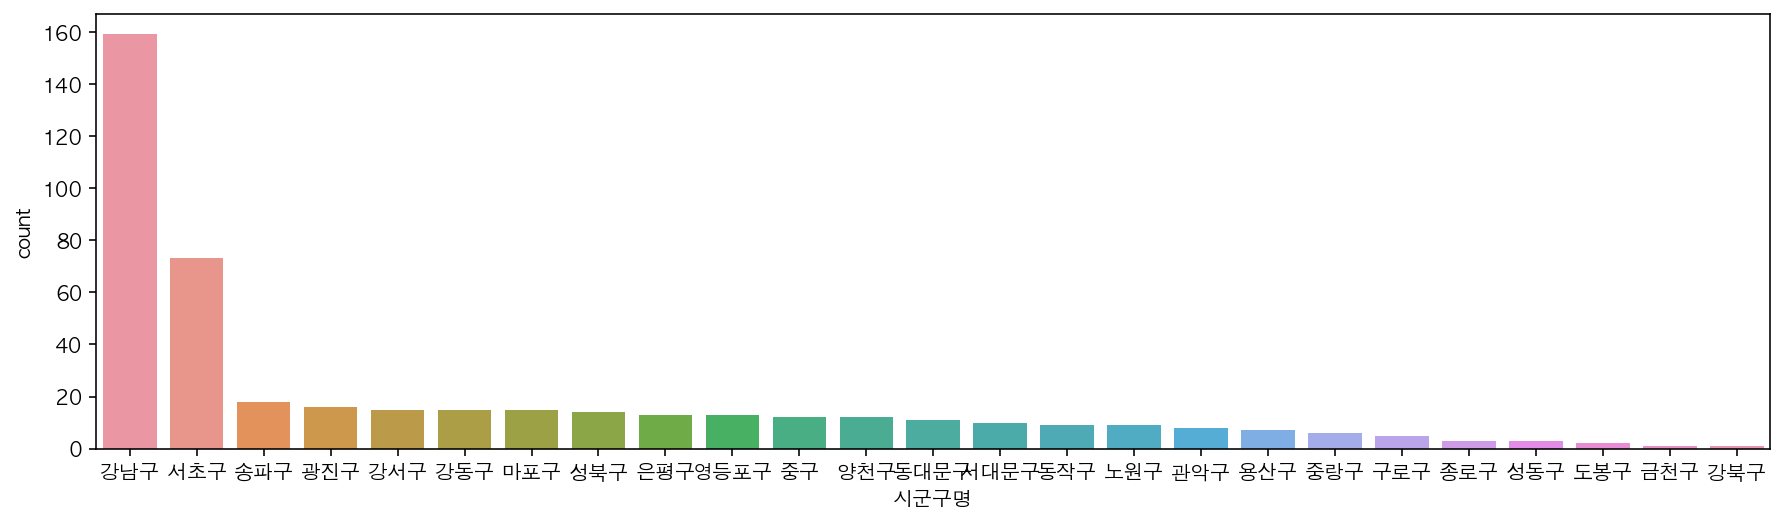

In [30]:
plt.figure(figsize = (15,4))
sns.countplot(data=df_medical_seoul, x="시군구명",
             order = c.index)

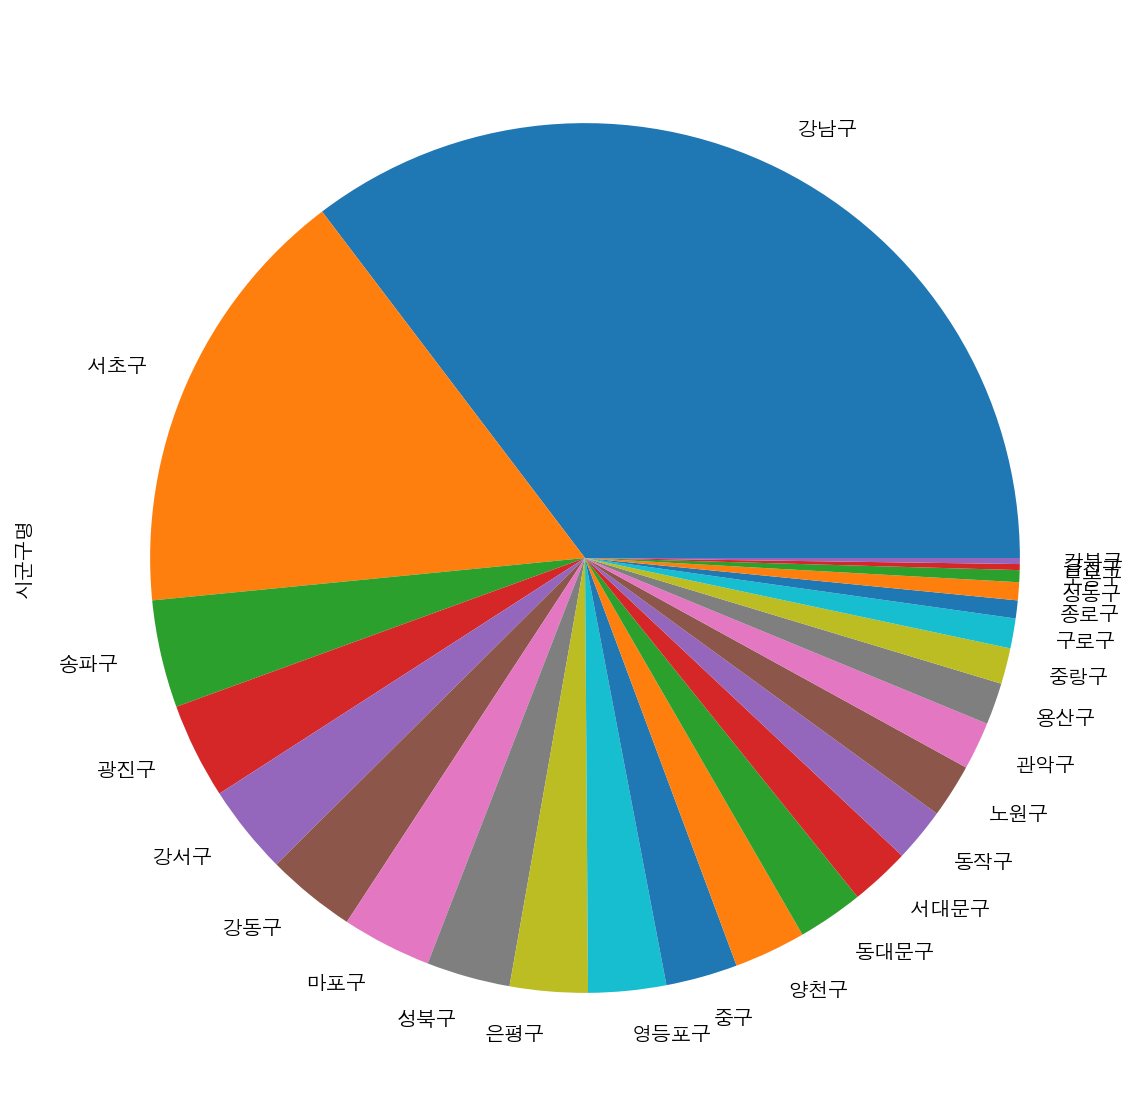

In [38]:
c.plot.pie(figsize=(10,10))